In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("C:/Users/Dell/Downloads/car_evaluation.csv",header=None)

In [10]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [13]:
# Check dataset information to confirm feature count, data types, and null values
data_info = df.info()

# Display unique values in each column to better understand features and the target variable
unique_values = {col: df[col].unique() for col in df.columns}

data_info, unique_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


(None,
 {0: array(['vhigh', 'high', 'med', 'low'], dtype=object),
  1: array(['vhigh', 'high', 'med', 'low'], dtype=object),
  2: array(['2', '3', '4', '5more'], dtype=object),
  3: array(['2', '4', 'more'], dtype=object),
  4: array(['small', 'med', 'big'], dtype=object),
  5: array(['low', 'med', 'high'], dtype=object),
  6: array(['unacc', 'acc', 'vgood', 'good'], dtype=object)})

## Import the Libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode all categorical features and the target variable
label_encoders = {col: LabelEncoder() for col in df.columns}
for col in df.columns:
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
X_train.head(), y_train.head()


(      0  1  2  3  4  5
 107   3  3  3  2  0  0
 901   2  3  1  1  2  2
 1709  1  1  3  0  0  0
 706   0  2  2  0  1  2
 678   0  2  1  0  1  1,
 107     2
 901     2
 1709    2
 706     2
 678     2
 Name: 6, dtype: int32)

## Descion Tree Classifier 

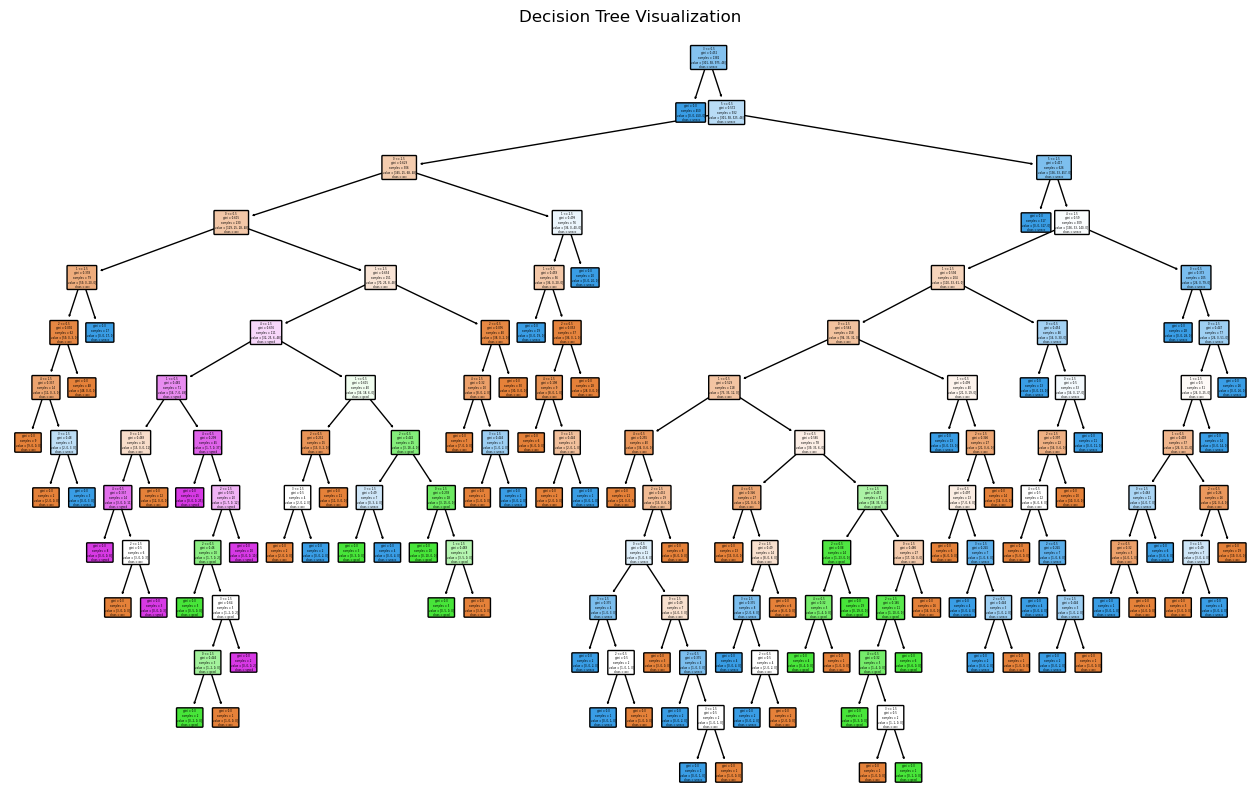

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, feature_names=X.columns.astype(str), class_names=label_encoders[6].classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=17)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=17)

In [29]:
from sklearn.metrics import accuracy_score

# Predict with Decision Tree
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Predict with Random Forest
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.9739884393063584
Random Forest Accuracy: 0.9595375722543352


## Here we have got same Accuracy so we'll do cross_validation score 

In [34]:
from sklearn.model_selection import cross_val_score

# Cross-validate Decision Tree
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print("Decision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())

# Cross-validate Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())


Decision Tree Cross-Validation Accuracy: 0.7934891513780682
Random Forest Cross-Validation Accuracy: 0.8091061405713328


## This cross-validation score difference suggests that, while the Decision Tree model may achieve a high single-split accuracy, the Random Forest is more consistent and thus a stronger choice for generalizing to unseen data.

In [33]:
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92        83
           1       0.56      0.91      0.69        11
           2       0.99      1.00      0.99       235
           3       0.89      0.94      0.91        17

    accuracy                           0.96       346
   macro avg       0.85      0.93      0.88       346
weighted avg       0.97      0.96      0.96       346



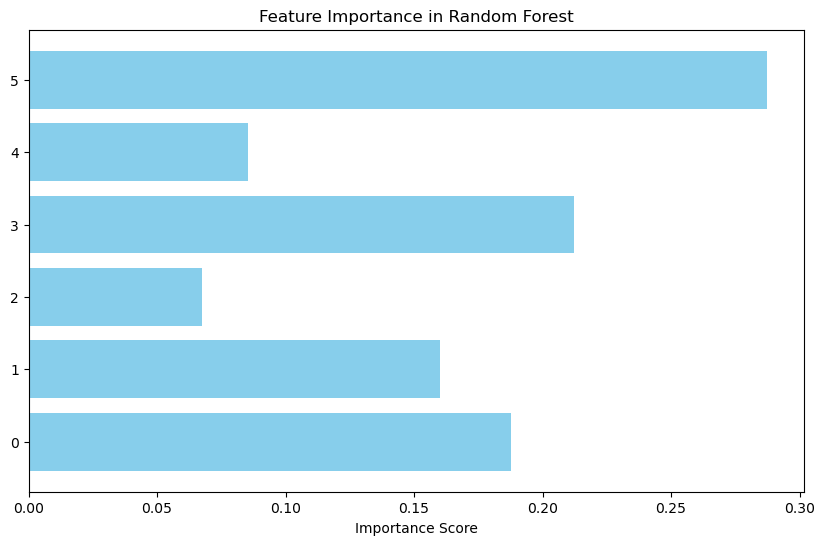

In [30]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()


## The col.5 feature has high importance  